In [1]:
import torch
from numpy import dtype
from sympy.codegen.ast import float32
from torchvision.transforms.v2 import ToTensor

x = torch.rand(3)
print(x)

torch.cuda.is_available()

x = torch.empty(3)
print(x)

tensor([0.1361, 0.9594, 0.1303])


True

In [ ]:
x = torch.empty(2, 3)
print(x)

In [ ]:
x = torch.empty(2, 3, 2)
print(x)

In [ ]:
x = torch.empty(2, 3, 2, 2)
print(x)

In [ ]:
x = torch.rand(2,2)
print(x)

In [ ]:
x = torch.zeros(2,2)
print(x)

In [ ]:
x = torch.ones(2,2)
print(x)

In [ ]:
x = torch.ones(2,2)
print(x.dtype)

In [ ]:
x = torch.ones(2,2, dtype=torch.int) #torch.double, torch.float16, torch.float64
print(x.dtype) #prints the dtype of the current tensor

In [ ]:
x = torch.ones(2,2, dtype=torch.float16)
print(x.size()) # prints the size of the current tensor

In [ ]:
x = torch.tensor([2.5, 0.1])
print(x)

BASIC OPERATIONS

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
z = torch.add(x,y)
print(z) # it does element wise addition


In [ ]:
y.add_(x) # inplace operation. Add all of the x's to the y. It modifies the variable in which it is applied to
print(y)

In [ ]:
z = x - y
z = torch.sub(x,y)
print(z)

In [ ]:
z = x * y
z = torch.mul(x,y)
print(z)
y.mul_(x) #inplace operation

In [ ]:
z = x / y
z = torch.div(x,y)

In [ ]:
#slciing operations
x = torch.rand(5,3)
print(x[:,0]) #slicing for all rows but only the first column of each row
print(x[1, :]) #slicing for only the first row but all of the columns from said row
#you can also get the value of a tensor, if and only if is a single element tensor
print(x[1, 1].item())


In [ ]:
# reshaping a tensor
x = torch.rand(4,4)
print(x)
y = x.view(16) #resizes the 16 values in a 4x4 tensor and a single 1x16. NOTE: the number of elements must match
print(y)

y = x.view(-1, 8) #if we don't want to resize to a single dimension tensor, then we can put a -1 on the first position and pytorch will correctly assume the dimension for the number of rows. i.e. 2x8
print(y.size)

In [2]:
#converting from numpy to tensor and viceversa
import numpy as np
# convert from a tensor into a np array
a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))  #i.e. numpy ndarray

#if the tensor is in the cpu, then both objects(tensor and nparray) will share the same memory location, so any change to either will reflect on the other
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [4]:
#convert from a numpy array to a tensor
a = np.ones(5)
print(a)
b = torch.from_numpy(a) #be careful changing the dtype, both must match. Otherwise you get an error
print(b)

a += 1
print(a)
print(b)


[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [6]:
#gpu operations
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.ones(5, device=device) #creates a tensor in the GPU 
    y = torch.ones(5) 
    y = y.to(device) # this moves the tensor to the GPU
    z = x + y # this will be computed in the GPU
    # you can't convert a GPU tensor into a numpy ndarray, so you must first move it into the cpu(numpy can only handle cpu tensors)
    z = z.to("cpu")
    print(z)

tensor([2., 2., 2., 2., 2.])


In [ ]:

x = torch.ones(5, requires_grad=True) #the requires_grad flag is FALSE by default. It tells pytorch that it will need to calculate the gradients for this tensor later in the optimization steps. 
print(x) # this will also print the requires_grad flag as well

Gradient Calculations with autograd

In [7]:
#gradients are essential for optimization
import torch 

x = torch.rand(3, requires_grad=True) # must specify the requires_grad to calculate the gradients
print(x)
y = x + 2 # pytorch creates a computational graph
# pytorch will compute the forward pass, and create a grad_fn function and calculate the gradients during the backpropagation step(dy/dx)
print(y) #has a grad_fn for AddBackward
z = y*y*2
print(z) #has a grad_fn for MulBackward
z = z.mean()
print(z) # has a grad_fn for MeanBackward

# now when we calculate the gradients for z 
z.backward() #backward gradient calculation  dz/dx. The backward function will only work with scalar values(single value), if called without an argument
print(x.grad) # the gradients are stored in x.grad
#NOTE if we don't specify the requires_grad, then we won't have a .backward() grad_fn, giving us an error
 



tensor([0.5928, 0.9772, 0.1487], requires_grad=True)
tensor([2.5928, 2.9772, 2.1487], grad_fn=<AddBackward0>)


The gradient calculation calculates a Jacobian product to get the gradients. We multiply the jacobian matrix containing the partial derivatives with a gradient vector(of the same size )

In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx
print(x.grad)

In [8]:
# sometimes during our training, when we want update the weight, we don't want pytorch to calculate the gradients
# we have 3 options for this

# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

x.requires_grad_(False) # the underscore means that pytorch will modify the variable in place
print(x)

y = x.detach() # creates a new tensor with the same values but it doesn't requrie the gradients (so requires_grad = False)
print(y)

with torch.no_grad():
    z = x + 2
    print(z)

tensor([0.5928, 0.9772, 0.1487])
tensor([0.5928, 0.9772, 0.1487])
tensor([2.5928, 2.9772, 2.1487])


In [11]:
# VERY IMPORTANT: Whenever we call the backward function, then the gradient for the tensor will be accumulated into the .grad attribute, so the values will be summed up
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad) #gradients get aggregated [[3...],[6....],[9.....]]
    weights.grad.zero_() #you must empty the gradients after each iteration to get the correct gradients [3....]
    
# same thing but with an optimizer
optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step() # next iteration
optimizer.zero_grad() # empty the gradients 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


BACKPROPAGATION - THEORY WITH EXAMPLES

In [12]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

#backward pass
loss.backward() #calculates the gradients during the backward pass and stores them in the tensors that have requires_grad 
print(w.grad) #prints the stored gradients for w

##update weights
## next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


GRADIENT DESCENT WITH AUTOGRAD AND BACKPROPAGATION

In [14]:
import numpy as np

# f = w * x
# f = 2 * x
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# calculate the model prediction
def forward(x):
    return w * x
# calculate the loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()
# calculate the gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient
    dw = gradient(x,y,y_pred)
    # update the weights
    w -= learning_rate*dw
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [17]:
#gradient calculation with torch
import torch

# f = w * x
# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate the model prediction
def forward(x):
    return w * x
# calculate the loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()
# calculate the gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    with torch.no_grad():
        w -= learning_rate*w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

In [18]:
# 1) Design model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop 
#   - Forward pass: compute the prediction 
#   - Backward pass: compute the gradients
#   - Update the weights 
import torch
import torch.nn as nn


# f = w * x
# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate the model prediction
def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')




Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

In [21]:
# 1) Design model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop 
#   - Forward pass: compute the prediction 
#   - Backward pass: compute the gradients
#   - Update the weights 
import torch
import torch.nn as nn


# f = w * x
# f = 2 * x
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')




4 1
Prediction before training: f(5) = -2.809
epoch 1: w = 0.018, loss = 54.00693512
epoch 11: w = 1.700, loss = 1.39800382
epoch 21: w = 1.970, loss = 0.03684373
epoch 31: w = 2.013, loss = 0.00158810
epoch 41: w = 2.019, loss = 0.00063898
epoch 51: w = 2.020, loss = 0.00057962
epoch 61: w = 2.019, loss = 0.00054531
epoch 71: w = 2.019, loss = 0.00051355
epoch 81: w = 2.018, loss = 0.00048367
epoch 91: w = 2.018, loss = 0.00045551
Prediction after training: f(5) = 10.036


LINEAR REGRESSION

epoch: 10, loss: 4328.2764
epoch: 20, loss: 3229.2681
epoch: 30, loss: 2434.4775
epoch: 40, loss: 1859.0608
epoch: 50, loss: 1442.0402
epoch: 60, loss: 1139.5271
epoch: 70, loss: 919.8884
epoch: 80, loss: 760.2917
epoch: 90, loss: 644.2373
epoch: 100, loss: 559.7878


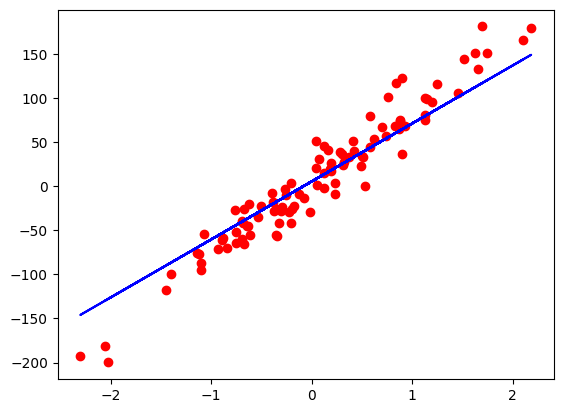

In [22]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape the tensor to a column vector
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape
# 1) model design 
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) define loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    # backward pass (backpropagation) i.e. calculation of the derivatives
    loss.backward()
    # update the weights
    optimizer.step() # updates the weights. The w is already in the optimizer, so no need to call w.grad to calculate the new weights
    optimizer.zero_grad() # empty out the gradients before the next iterations. Otherwise, the backward function will sum up the gradients into the .grad attribute(.grad is internal to the optimizer in this case)
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')
        
#plot
predicted = model(x).detach() # the detach disables the tensor from being tracked on the computational graph
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

LOGISTIC REGRESSION 

In [25]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape
print(n_samples, n_features)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
# scale the features
sc = StandardScaler() #when dealing with logistic, we want to scale our data to have zero mean and uniform variance 
X_train = sc.fit_transform(x_train) #what is the difference between fit_transform and just transform?
X_test = sc.transform(x_test)

X_train = torch.from_numpy(X_train.astype(np.float32)) # make sure to cast as np.float32 because the original data is of type Double and will cause problems down the road
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) # what is this shape change?
y_test = y_test.view(y_test.shape[0], 1)

# 1) setup the model 
# f = wx + b, sigmoid function at the end 
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2) setup the loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss calculation
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    #backward pass
    loss.backward()
    #updates weights
    optimizer.step()
    #zero gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')
        
with torch.no_grad(): # for evaluation, we don't want the gradient calculations to be tracked in the computational graph for (model), so we must use torch.no_grad()
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc:.4f}')

569 30
epoch: 10, loss: 0.4224
epoch: 20, loss: 0.3759
epoch: 30, loss: 0.3416
epoch: 40, loss: 0.3151
epoch: 50, loss: 0.2938
epoch: 60, loss: 0.2764
epoch: 70, loss: 0.2617
epoch: 80, loss: 0.2491
epoch: 90, loss: 0.2383
epoch: 100, loss: 0.2287
Accuracy: 0.8947


DATASET AND DATALOADER  

In [50]:
'''
epoch = 1 forward and backward pass of ALL training samples
batch_size = number of training samples in one forward & backward pass
number of iterations = number of passes, each pass using [batch_size] number of samples
e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch
'''
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]

    def __getitem__(self, item):
        # dataset[0] helps for indexing
        return self.x[item], self.y[item]
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()
# data iteration without dataloader
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)

# data iteration with dataloader
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)
# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# print(features, labels)

#training loop
num_epochs = 2
batch_size = 4
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward and backward pass, update the weights
        if (i+5) % 5 ==0:
            print(f'epoch: {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')


178 45
epoch: 1/2, step 1/45, inputs torch.Size([4, 13])
epoch: 1/2, step 6/45, inputs torch.Size([4, 13])
epoch: 1/2, step 11/45, inputs torch.Size([4, 13])
epoch: 1/2, step 16/45, inputs torch.Size([4, 13])
epoch: 1/2, step 21/45, inputs torch.Size([4, 13])
epoch: 1/2, step 26/45, inputs torch.Size([4, 13])
epoch: 1/2, step 31/45, inputs torch.Size([4, 13])
epoch: 1/2, step 36/45, inputs torch.Size([4, 13])
epoch: 1/2, step 41/45, inputs torch.Size([4, 13])
epoch: 2/2, step 1/45, inputs torch.Size([4, 13])
epoch: 2/2, step 6/45, inputs torch.Size([4, 13])
epoch: 2/2, step 11/45, inputs torch.Size([4, 13])
epoch: 2/2, step 16/45, inputs torch.Size([4, 13])
epoch: 2/2, step 21/45, inputs torch.Size([4, 13])
epoch: 2/2, step 26/45, inputs torch.Size([4, 13])
epoch: 2/2, step 31/45, inputs torch.Size([4, 13])
epoch: 2/2, step 36/45, inputs torch.Size([4, 13])
epoch: 2/2, step 41/45, inputs torch.Size([4, 13])


DATASET TRANSFORM

In [53]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data during creation of the DataSet

complete list of built-in transforms:
https://pytorch.org/docs/stable/transforms.html

On Images
----------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomVerticalFlip, 
RandomRotation, Resize, Scale

On Tensors
-----------
LinearTransformation, Normalize, RandomErasing

Conversion
-----------
ToPilImage: from tensor or ndarray
ToTensor: from numpy.ndarray or PILImage

Generic
-----------
Use Lambda

Custom
-----------
Write own class

Compose Multiple Transforms
-----------------------------
composed = transforms.Compose([Rescale(256),
                                RandomCrop(224),])
torchvision.transforms.ReScale(256)
torchvision.transforms.ToTensor()

dataset = torchvision.datasets.MNIST( root="./", transform=torchvision.transforms.ToTensor())

'''
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform=None): # the = on the parameter indicates default value, which in this case would be None
        # data loading
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]
        
        #note that we do not convert to tensor here
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.transform = transform

    def __getitem__(self, item):
        # dataset[0] helps for indexing
        sample =  self.x[item], self.y[item]
        # if there is a transform
        if self.transform:
            sample = self.transform(sample) # applies the custom transform class. 
            
        return sample  # return the sample, with a transform if one was specified
            
    def __len__(self):
        # len(dataset)
        return self.n_samples

# custom transform class
class ToTensor:
    def __call__(self, sample): # the call function gets called automatically when we pass a sample into the ToTensor class as a function
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
# a multiplication transform class
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets
    
dataset = WineDataset(transform=ToTensor()) 
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels)) # should be a torch.Tensor class

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels)) # should be a torch.Tensor class






tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


SOFTMAX AND CROSS-ENTROPY FUNCTIONS   

In [56]:
'''
The Softmax function squashes the raw outputs into probabilities i.e.[0 - 1]. It does this by applying the exponential function to each input
and normalizing it by the sum of all inputs
'''
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0) # axis of x sums up the inputs across the columns, and y sums up the inputs across the rows.

x = np.array([2.0,1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

# torch version of softmax
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # dim is the same as axis for numpy
print('softmax torch:', outputs)



softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [ ]:
'''
A lot times the softmax is combined with the cross-entropy loss function. This measures the performance of our classification model, whose output is a probability between 
0 and 1. It can be used in multi class problems. The loss increases as the predictor probability diverges from the actual label. So the better the prediction, the lower the loss. 
Note: in the case for probability label prediction, our label (Y), needs to be one-hot encoded i.e. Y = [1,0,0]. 

Y = [1, 0, 0] (Actual class label)
(predicted class label from softmax)
Y_hat = [0.7, 0.2, 0.1]  
Cross_entropy = D(Y, Y_hat) = 0.35 (GOOD PREDICTION)

Y = [1, 0, 0] (Actual class label)
(predicted class label from softmax)
Y_hat = [0.1, 0.3, 0.6]  
Cross_entropy = D(Y, Y_hat) = 2.30 (GOOD PREDICTION)
'''

# Cross-Entropy code numpy
import torch 
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0]) The cross-entropy eqn dictates we normalize the output 

# y must be one hot encoded 
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

In [61]:
import torch 
import torch.nn as nn
import numpy as np
'''
Careful! 
nn.CrossEntropyLoss() applies:
nn.LogSoftmax() + nn.NLLLoss() (negative log likelihood loss)

--> No Softmax in last layer! i.e. we should not implement the softmax ourselves, since it is already applied

Y has clas labels, NOT ONE-HOT!
Y_pred has raw scores(logits), NO SOFTMAX!
'''
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0]) # remember it is not one hot encoded, but rather class label
# n_samples * n_classes = 1x3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # the class prediction has the raw values, no softmax i.e. normalization
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y) # here order matters, loss(prediction, actual)
l2 = loss(Y_pred_bad, Y)

print(f'L1 loss tensor {l1.item()}')
print(f'L2 loss tensor {l2.item()}')

# actual predictions
_, predictions1 = torch.max(Y_pred_good, dim=1)
_, predictions2 = torch.max(Y_pred_bad, dim=1)
print(predictions1)
print(predictions2)

# loss function with multiple samples
# 3 samples
Y = torch.tensor([2, 0, 1])
# n_samples * n_classes = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) # the class prediction has the raw values, no softmax i.e. normalization
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y) # here order matters, loss(prediction, actual)
l2 = loss(Y_pred_bad, Y)

print(f'L1 loss tensor 3 samples: {l1.item()}')
print(f'L2 loss tensor 3 samples: {l2.item()}')

# actual predictions
_, predictions1 = torch.max(Y_pred_good, dim=1)
_, predictions2 = torch.max(Y_pred_bad, dim=1)
print(predictions1)
print(predictions2)


L1 loss tensor 0.4170299470424652
L2 loss tensor 1.840616226196289
tensor([0])
tensor([1])
L1 loss tensor 3 samples: 0.3018244206905365
L2 loss tensor 3 samples: 1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [64]:
'''
Multiclass cross entropy using a NN and torch.CrossEntropyLoss function
'''
import torch 
import torch.nn as nn
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.linear1(x) # input layer
        out = self.relu(out) # activation function 
        out = self.linear2(out) # last layer
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax
# missing parts: data, run the forward and then calculate the loss. 
# TODO: implement this shit 


In [ ]:
'''
Binary class Neural Network with cross entropy. We ask: is this a dog?
For this example, we only have one output on our last layer and then apply the sigmoid(which will return a probability between 0-1 with <0.5=false, >0.5=true)
In PyTorch: Use nn.BCELoss()
Sigmoid at the end!
'''
import torch
import torch.nn as nn

# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size): # no need for num_classes since we only have one class
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1) # only one output 
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        #sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred
    
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()
# TODO: implement this shit 

ACTIVATION FUNCTIONS    

In [ ]:
''''
Activation Functions:
Activation functions apply a non-linear transformation and decide whether a neuron should be activated or not
WHY?
Without activation functions our network is basically just a stacked linear regression model. We use non-linear activation functions
so that our model can learn more complex behaviors and perform better.
--> With non-linear transformations our network can learn better and perform more complex tasks!
--> After each layer we typically use an activation function!

Most popular activation functions:
1.- Step function: output 1 if outputs is greater than a threshold(theta) and 0 otherwise. Not use in practice
2.- Sigmoid Function: Output a probability between 0 and 1. It is typically used in the last layer of a binary classification problem
3.- TanH Function(Hyperbolic tan function): It is a scaled sigmoid function with some shift. It will output a value between -1 and +1. 
It is a good option for hidden layers
4.- ReLU Function: Most popular activation function. The function will output a 0 for negative values and output a linear function for values greater than 0. It is actually non-linear (f(x) = max(0,x))
Rule of thumb: If you don't know what to use, just use a ReLU for hidden layers
5.- Leaky ReLU Function: For negative numbers, it will output the value times a small value "a", and the regular ReLU otherwise
--> Improved version of ReLU. Tries to solve the vanishing gradient problem. With a normal ReLU, our values for negative inputs are 0 and this means that the gradient is also 0 during our backpropagation. When the gradient is 0, the weights will never be updated, so the neurons won't learn anything because they are dead. 
6.- SoftMax: Squashing function that forces the outputs to be probabilities between 0 and 1.  
--> Good in last layer in multi class classification problems 
'''
import torch 
import torch.nn as nn
import torch.nn.functional as F
 
''''
Activation functions in nn:
- nn.Sigmoid
- nn.TanH
- nn.LeakyReLU
- nn.Softmax

Activation functions in torch:
- torch.relu
- torch.sigmoid
- torch.softmax
- torch.tanh

Some activation functions are not available in the torch api directly, but they are available in the torch.nn.functional:
- F.relu
- F.leaky_relu
'''
# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    
# option 2 (use activation functions directly in forward pass)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out
